In [3]:
import numpy as np
from sklearn import linear_model,datasets,tree
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.metrics as metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC  
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
pd.set_option('display.max_columns', None)
%matplotlib inline

In [4]:
iri = pd.read_excel('Clean_Data.xlsx')

Class 0: 11528
Class 1: 4052
Proportion: 2.845014807502468 : 1


([<matplotlib.axis.XTick at 0x25e0eafc4a8>,
 <a list of 2 Text xticklabel objects>)

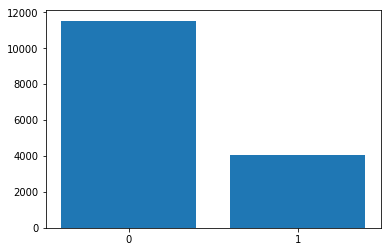

In [6]:
iris=iri #.select_dtypes(['number'])
for column in iris.columns:
    if iris[column].dtype == type(object):
        le = preprocessing.LabelEncoder()
        iris[column] = le.fit_transform(iris[column])
iri2=iris
X=iri2.drop(labels=['GSTATUS'], axis=1).values
Y = iri2.GSTATUS.values
unique, counts = np.unique(Y, return_counts=True)
target_count=dict(zip(unique, counts))
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', target_count[0] / target_count[1], ': 1')
dictionary = plt.figure()
plt.bar(range(len(target_count)), target_count.values(), align='center')
plt.xticks(range(len(target_count)), target_count.keys())

In [4]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=10)
X_train, X_val, Y_train, Y_val = model_selection.train_test_split(X_train,Y_train, test_size=0.2, random_state=10)

In [5]:
def evaluate_threshold(threshold,tpr,fpr,thresholds):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [6]:
def acuracy_auc_and_confusionmatrix(model,x_val,y_val,x_test,y_test):
    validation_set_predictions = [model.predict(x_val[i].reshape((1,132))) for i in range(x_val.shape[0])]
    validation_misclassification_percentage = 0
    for i in range(len(validation_set_predictions)):
        if validation_set_predictions[i]!=y_val[i]:
            validation_misclassification_percentage+=1
    validation_misclassification_percentage *= 100/len(y_val)
    print ('validation misclassification percentage =', validation_misclassification_percentage, '%')
    test_set_predictions = [model.predict(x_test[i].reshape((1,132))) for i in range(x_test.shape[0])]
    print(x_test.shape)
    test_misclassification_percentage = 0
    for i in range(len(test_set_predictions)):
        if test_set_predictions[i]!=y_test[i]:
            test_misclassification_percentage+=1
    test_misclassification_percentage *= 100/len(y_test)
    print ('test misclassification percentage =', test_misclassification_percentage, '%')
    print(accuracy_score(y_val, validation_set_predictions),accuracy_score(y_test, test_set_predictions))
    print(confusion_matrix(y_val, validation_set_predictions))
    print(confusion_matrix(y_test, test_set_predictions))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, test_set_predictions)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('ROC curve for diabetes classifier')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.grid(True)
    evaluate_threshold(0.5,tpr,fpr,thresholds)
    print(metrics.roc_auc_score(y_test, test_set_predictions))


validation misclassification percentage = 0.0 %
(3116, 132)
test misclassification percentage = 0.12836970474967907 %
1.0 0.9987163029525032
[[1851    0]
 [   0  642]]
[[2280    2]
 [   2  832]]
Sensitivity: 0.9976019184652278
Specificity: 0.9991235758106923
0.99836274713796


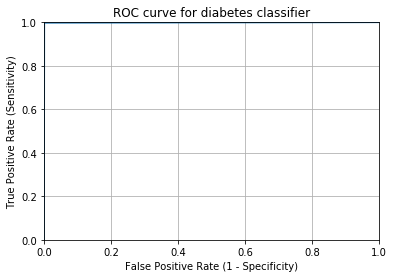

In [7]:
model = linear_model.LogisticRegression(C=1e5)#C is the inverse of the regularization factor
model.fit(X_train,Y_train)
acuracy_auc_and_confusionmatrix(model,X_val,Y_val,X_test,Y_test)

validation misclassification percentage = 0.20056157240272765 %
(3116, 132)
test misclassification percentage = 0.16046213093709882 %
0.9979943842759728 0.998395378690629
[[1851    0]
 [   5  637]]
[[2281    1]
 [   4  830]]
Sensitivity: 0.9952038369304557
Specificity: 0.9995617879053462
0.9973828124179009


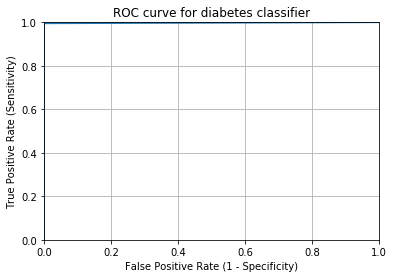

In [8]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30),max_iter=200000)
mlp.fit(X_train,Y_train)
acuracy_auc_and_confusionmatrix(mlp,X_val,Y_val,X_test,Y_test)

validation misclassification percentage = 0.08022462896109106 %
(3116, 132)
test misclassification percentage = 0.03209242618741977 %
0.9991977537103891 0.9996790757381258
[[1851    0]
 [   2  640]]
[[2281    1]
 [   0  834]]
Sensitivity: 1.0
Specificity: 0.9995617879053462
0.9997808939526731


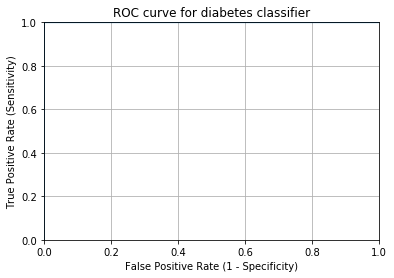

In [9]:
svclassifierpoly = SVC(kernel='poly', degree=6)  
svclassifierpoly.fit(X_train, Y_train)  
acuracy_auc_and_confusionmatrix(svclassifierpoly,X_val,Y_val,X_test,Y_test)

validation misclassification percentage = 0.04011231448054553 %
(3116, 132)
test misclassification percentage = 0.03209242618741977 %
0.9995988768551946 0.9996790757381258
[[1851    0]
 [   1  641]]
[[2281    1]
 [   0  834]]
Sensitivity: 1.0
Specificity: 0.9995617879053462
0.9997808939526731


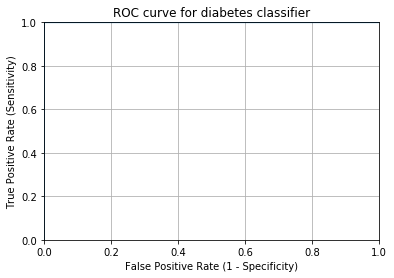

In [10]:
svclassifierlinear = SVC(kernel='linear')  
svclassifierlinear.fit(X_train, Y_train)
acuracy_auc_and_confusionmatrix(svclassifierlinear,X_val,Y_val,X_test,Y_test)

validation misclassification percentage = 0.0 %
(3116, 132)
test misclassification percentage = 0.0 %
1.0 1.0
[[1851    0]
 [   0  642]]
[[2282    0]
 [   0  834]]
Sensitivity: 1.0
Specificity: 1.0
1.0


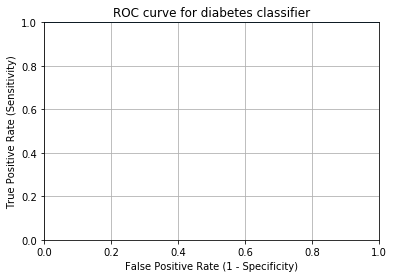

In [11]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
acuracy_auc_and_confusionmatrix(model,X_val,Y_val,X_test,Y_test)

In [12]:
def acuracy_auc_and_confusionmatrix10Fold(model,x_test,y_test):
    test_set_predictions = [model.predict(x_test[i].reshape((1,132))) for i in range(x_test.shape[0])]
    print(x_test.shape)
    test_misclassification_percentage = 0
    for i in range(len(test_set_predictions)):
        if test_set_predictions[i]!=y_test[i]:
            test_misclassification_percentage+=1
    test_misclassification_percentage *= 100/len(y_test)
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import confusion_matrix
    ac=accuracy_score(y_test, test_set_predictions)
    print(ac)
    print(confusion_matrix(y_test, test_set_predictions))  
    fpr, tpr, thresholds = metrics.roc_curve(y_test, test_set_predictions)
    evaluate_threshold(0.5,tpr,fpr,thresholds)
    auc=metrics.roc_auc_score(y_test, test_set_predictions)
    print(auc)
    return (ac,auc) 

In [13]:
#using 10-fold cross valitation
K = 10
ac=[]
auc=[]
kf = model_selection.KFold(n_splits=K, shuffle=True, random_state=42)
for train_index, val_index in kf.split(X, Y):
    X_train, X_test = X[train_index], X[val_index]
    y_train, y_test = Y[train_index], Y[val_index]
    mlp = MLPClassifier(hidden_layer_sizes=(30,30,30),max_iter=200000)
    mlp.fit(X_train,y_train)
    acg,aucg=acuracy_auc_and_confusionmatrix10Fold(mlp,X_test,y_test)
    ac.append(acg)
    auc.append(aucg)
print("10foldcrossvalidation acuracy for ann",np.mean(ac))
print("10foldcrossvalidation auc for ann",np.mean(auc))


(1558, 132)
0.993581514762516
[[1145   10]
 [   0  403]]
Sensitivity: 1.0
Specificity: 0.9913419913419913
0.9956709956709956
(1558, 132)
0.9993581514762516
[[1159    0]
 [   1  398]]
Sensitivity: 0.9974937343358395
Specificity: 1.0
0.9987468671679198
(1558, 132)
0.9961489088575096
[[1168    4]
 [   2  384]]
Sensitivity: 0.9948186528497409
Specificity: 0.9965870307167235
0.9957028417832322
(1558, 132)
0.9505776636713735
[[1076   77]
 [   0  405]]
Sensitivity: 1.0
Specificity: 0.9332176929748482
0.9666088464874242
(1558, 132)
0.9974326059050064
[[1142    0]
 [   4  412]]
Sensitivity: 0.9903846153846154
Specificity: 1.0
0.9951923076923077
(1558, 132)
0.9980744544287549
[[1169    1]
 [   2  386]]
Sensitivity: 0.9948453608247423
Specificity: 0.9991452991452991
0.9969953299850207
(1558, 132)
0.9980744544287549
[[1166    1]
 [   2  389]]
Sensitivity: 0.9948849104859335
Specificity: 0.9991431019708654
0.9970140062283995
(1558, 132)
0.9942233632862645
[[1109    9]
 [   0  440]]
Sensitivity: 1.0

In [14]:
#using 10-fold cross valitation
K = 10
ac=[]
auc=[]
kf = model_selection.KFold(n_splits=K, shuffle=True, random_state=42)
for train_index, val_index in kf.split(X, Y):
    X_train, X_test = X[train_index], X[val_index]
    y_train, y_test = Y[train_index], Y[val_index]
    model = linear_model.LogisticRegression(C=1e5)#C is the inverse of the regularization factor
    model.fit(X_train,y_train)
    acg,aucg=acuracy_auc_and_confusionmatrix10Fold(model,X_test,y_test)
    ac.append(acg)
    auc.append(aucg)
print("10foldcrossvalidation acuracy for lr",np.mean(ac))
print("10foldcrossvalidation auc for lr",np.mean(auc))


(1558, 132)
1.0
[[1155    0]
 [   0  403]]
Sensitivity: 1.0
Specificity: 1.0
1.0
(1558, 132)
0.9987163029525032
[[1159    0]
 [   2  397]]
Sensitivity: 0.9949874686716792
Specificity: 1.0
0.9974937343358397
(1558, 132)
0.9987163029525032
[[1171    1]
 [   1  385]]
Sensitivity: 0.9974093264248705
Specificity: 0.9991467576791809
0.9982780420520256
(1558, 132)
0.9987163029525032
[[1152    1]
 [   1  404]]
Sensitivity: 0.9975308641975309
Specificity: 0.9991326973113617
0.9983317807544463
(1558, 132)
0.9987163029525032
[[1142    0]
 [   2  414]]
Sensitivity: 0.9951923076923077
Specificity: 1.0
0.9975961538461539
(1558, 132)
1.0
[[1170    0]
 [   0  388]]
Sensitivity: 1.0
Specificity: 1.0
1.0
(1558, 132)
0.9987163029525032
[[1166    1]
 [   1  390]]
Sensitivity: 0.9974424552429667
Specificity: 0.9991431019708654
0.998292778606916
(1558, 132)
0.9974326059050064
[[1117    1]
 [   3  437]]
Sensitivity: 0.9931818181818182
Specificity: 0.9991055456171736
0.996143681899496
(1558, 132)
0.9993581514

In [15]:
#using 10-fold cross valitation
K = 10
ac=[]
auc=[]
kf = model_selection.KFold(n_splits=K, shuffle=True, random_state=42)
for train_index, val_index in kf.split(X, Y):
    X_train, X_test = X[train_index], X[val_index]
    y_train, y_test = Y[train_index], Y[val_index]
    svclassifierlinear = SVC(kernel='linear')  
    svclassifierlinear.fit(X_train, y_train)
    acg,aucg=acuracy_auc_and_confusionmatrix10Fold(svclassifierlinear,X_test,y_test)
    ac.append(acg)
    auc.append(aucg)
print("10foldcrossvalidation acuracy for svmlinear",np.mean(ac))
print("10foldcrossvalidation auc for svmlinear",np.mean(auc))

(1558, 132)
1.0
[[1155    0]
 [   0  403]]
Sensitivity: 1.0
Specificity: 1.0
1.0
(1558, 132)
1.0
[[1159    0]
 [   0  399]]
Sensitivity: 1.0
Specificity: 1.0
1.0
(1558, 132)
1.0
[[1172    0]
 [   0  386]]
Sensitivity: 1.0
Specificity: 1.0
1.0
(1558, 132)
0.9993581514762516
[[1152    1]
 [   0  405]]
Sensitivity: 1.0
Specificity: 0.9991326973113617
0.9995663486556808
(1558, 132)
0.9993581514762516
[[1141    1]
 [   0  416]]
Sensitivity: 1.0
Specificity: 0.999124343257443
0.9995621716287215
(1558, 132)
1.0
[[1170    0]
 [   0  388]]
Sensitivity: 1.0
Specificity: 1.0
1.0
(1558, 132)
1.0
[[1167    0]
 [   0  391]]
Sensitivity: 1.0
Specificity: 1.0
1.0
(1558, 132)
1.0
[[1118    0]
 [   0  440]]
Sensitivity: 1.0
Specificity: 1.0
1.0
(1558, 132)
0.9993581514762516
[[1111    1]
 [   0  446]]
Sensitivity: 1.0
Specificity: 0.9991007194244604
0.9995503597122303
(1558, 132)
1.0
[[1180    0]
 [   0  378]]
Sensitivity: 1.0
Specificity: 1.0
1.0
10foldcrossvalidation acuracy for svmlinear 0.9998074454

In [16]:
#using 10-fold cross valitation
K = 10
ac=[]
auc=[]
kf = model_selection.KFold(n_splits=K, shuffle=True, random_state=42)
for train_index, val_index in kf.split(X, Y):
    X_train, X_test = X[train_index], X[val_index]
    y_train, y_test = Y[train_index], Y[val_index]
    svclassifierpoly = SVC(kernel='poly', degree=6)  
    svclassifierpoly.fit(X_train, y_train)  
    acg,aucg=acuracy_auc_and_confusionmatrix10Fold(svclassifierpoly,X_test,y_test)
    ac.append(acg)
    auc.append(aucg)
print("10foldcrossvalidation acuracy for svmpoly",np.mean(ac))
print("10foldcrossvalidation auc for svmpoly",np.mean(auc))

(1558, 132)
1.0
[[1155    0]
 [   0  403]]
Sensitivity: 1.0
Specificity: 1.0
1.0
(1558, 132)
1.0
[[1159    0]
 [   0  399]]
Sensitivity: 1.0
Specificity: 1.0
1.0
(1558, 132)
1.0
[[1172    0]
 [   0  386]]
Sensitivity: 1.0
Specificity: 1.0
1.0
(1558, 132)
1.0
[[1153    0]
 [   0  405]]
Sensitivity: 1.0
Specificity: 1.0
1.0
(1558, 132)
1.0
[[1142    0]
 [   0  416]]
Sensitivity: 1.0
Specificity: 1.0
1.0
(1558, 132)
1.0
[[1170    0]
 [   0  388]]
Sensitivity: 1.0
Specificity: 1.0
1.0
(1558, 132)
1.0
[[1167    0]
 [   0  391]]
Sensitivity: 1.0
Specificity: 1.0
1.0
(1558, 132)
1.0
[[1118    0]
 [   0  440]]
Sensitivity: 1.0
Specificity: 1.0
1.0
(1558, 132)
0.9993581514762516
[[1112    0]
 [   1  445]]
Sensitivity: 0.9977578475336323
Specificity: 1.0
0.9988789237668161
(1558, 132)
1.0
[[1180    0]
 [   0  378]]
Sensitivity: 1.0
Specificity: 1.0
1.0
10foldcrossvalidation acuracy for svmpoly 0.9999358151476251
10foldcrossvalidation auc for svmpoly 0.9998878923766815


In [17]:
#using 10-fold cross valitation
K = 10
ac=[]
auc=[]
kf = model_selection.KFold(n_splits=K, shuffle=True, random_state=42)
for train_index, val_index in kf.split(X, Y):
    X_train, X_test = X[train_index], X[val_index]
    y_train, y_test = Y[train_index], Y[val_index]
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    acg,aucg=acuracy_auc_and_confusionmatrix10Fold(model,X_test,y_test)
    ac.append(acg)
    auc.append(aucg)
print("10foldcrossvalidation acuracy for cart",np.mean(ac))
print("10foldcrossvalidation auc for cart",np.mean(auc))

(1558, 132)
1.0
[[1155    0]
 [   0  403]]
Sensitivity: 1.0
Specificity: 1.0
1.0
(1558, 132)
1.0
[[1159    0]
 [   0  399]]
Sensitivity: 1.0
Specificity: 1.0
1.0
(1558, 132)
1.0
[[1172    0]
 [   0  386]]
Sensitivity: 1.0
Specificity: 1.0
1.0
(1558, 132)
1.0
[[1153    0]
 [   0  405]]
Sensitivity: 1.0
Specificity: 1.0
1.0
(1558, 132)
1.0
[[1142    0]
 [   0  416]]
Sensitivity: 1.0
Specificity: 1.0
1.0
(1558, 132)
0.9993581514762516
[[1170    0]
 [   1  387]]
Sensitivity: 0.9974226804123711
Specificity: 1.0
0.9987113402061856
(1558, 132)
1.0
[[1167    0]
 [   0  391]]
Sensitivity: 1.0
Specificity: 1.0
1.0
(1558, 132)
1.0
[[1118    0]
 [   0  440]]
Sensitivity: 1.0
Specificity: 1.0
1.0
(1558, 132)
1.0
[[1112    0]
 [   0  446]]
Sensitivity: 1.0
Specificity: 1.0
1.0
(1558, 132)
1.0
[[1180    0]
 [   0  378]]
Sensitivity: 1.0
Specificity: 1.0
1.0
10foldcrossvalidation acuracy for cart 0.9999358151476251
10foldcrossvalidation auc for cart 0.9998711340206186
